In [33]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [34]:
df = pd.read_parquet("데이터/크루드오일최종.parquet")

In [35]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Join words back to string
    text = ' '.join(words)
    return text

In [36]:
# Apply preprocessing to the 'title' column
df['title'] = df['title'].apply(preprocess_text)


In [37]:
df

,date,title,embeddings
0,1986-01-01,mexico cuts crude oil price,"[-0.028600167, 0.06366259, 0.06509828, 0.06924..."
1,1986-01-02,oil prices set take cuts,"[-0.07086328, -0.035549566, 0.12355209, -0.007..."
2,1986-01-03,us firms cutting back oil gas exploration,"[0.00719683, -0.050083093, 0.07776152, 0.06015..."
3,1986-01-05,us gas oil exploration cut back,"[-0.026277412, -0.019784242, 0.09362018, 0.094..."
4,1986-01-06,upg falco canada ups canada notice oil producers,"[-0.101025015, -0.039316747, 0.045170527, -0.0..."
...,...,...,...
4041,2001-12-25,lisa slnghania,"[-0.10749781, -0.0026047279, -0.05748843, 0.02..."
4042,2001-12-27,heating oil prices dip mild weather slowed demand,"[-0.014519843, 0.0033875713, 0.1825178, 0.1174..."
4043,2001-12-28,opec oil ministers lean toward large cut crude...,"[-0.016563358, 0.022972042, 0.09267036, 0.0834..."
4044,2001-12-29,opec votes slash oil production,"[-0.058327142, -0.030079706, 0.097474575, 0.06..."


In [38]:
# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['title'])

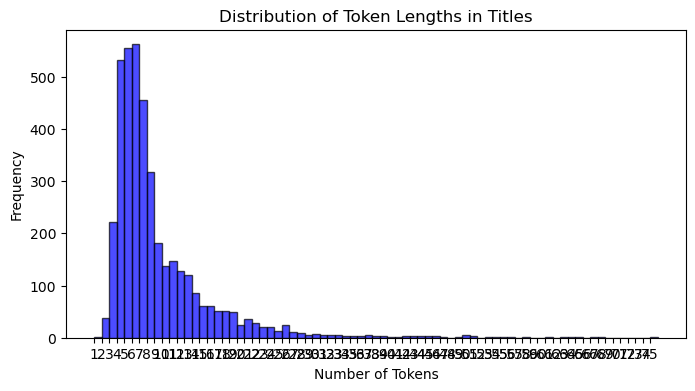

In [49]:
# Convert text to sequences
#sequences = tokenizer.texts_to_sequences(df['title'])

# Calculate lengths of each sequence
sequence_lengths = [len(seq) for seq in sequences]

# Plotting the distribution of sequence lengths
plt.figure(figsize=(8, 4))
plt.hist(sequence_lengths, bins=range(min(sequence_lengths), max(sequence_lengths) + 2), alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Token Lengths in Titles')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.xticks(range(min(sequence_lengths), max(sequence_lengths) + 1))  # Ensuring integer labels on x-axis
plt.show()

In [53]:
# Calculating the mean and max length of sequences
mean_length = sum(sequence_lengths) / len(sequence_lengths)
max_length = max(sequence_lengths)

print(max_length)

75


In [51]:
# Find indices of the titles that have the max length
max_length_indices = [index for index, length in enumerate(sequence_lengths) if length == max_length]


In [52]:
max_length_indices

[187]

In [42]:
df.loc[186,'title'] = 'crude oil prices soar announcement opec agrees cut crude oil prices soar us gas prices pushed fall oil futures jump heavy trading follows try lead mexico plans export cuts crude oil fuel cost changes present uncertain inventory report drops oil prices oil gas prices increase sharply trading volatile oil cut nut could help us nroducers oil drops pump rise likely oil price surge follows opecs surprise treaty'

In [43]:
df

,date,title,embeddings
0,1986-01-01,mexico cuts crude oil price,"[-0.028600167, 0.06366259, 0.06509828, 0.06924..."
1,1986-01-02,oil prices set take cuts,"[-0.07086328, -0.035549566, 0.12355209, -0.007..."
2,1986-01-03,us firms cutting back oil gas exploration,"[0.00719683, -0.050083093, 0.07776152, 0.06015..."
3,1986-01-05,us gas oil exploration cut back,"[-0.026277412, -0.019784242, 0.09362018, 0.094..."
4,1986-01-06,upg falco canada ups canada notice oil producers,"[-0.101025015, -0.039316747, 0.045170527, -0.0..."
...,...,...,...
4041,2001-12-25,lisa slnghania,"[-0.10749781, -0.0026047279, -0.05748843, 0.02..."
4042,2001-12-27,heating oil prices dip mild weather slowed demand,"[-0.014519843, 0.0033875713, 0.1825178, 0.1174..."
4043,2001-12-28,opec oil ministers lean toward large cut crude...,"[-0.016563358, 0.022972042, 0.09267036, 0.0834..."
4044,2001-12-29,opec votes slash oil production,"[-0.058327142, -0.030079706, 0.097474575, 0.06..."


In [44]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

In [45]:
# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 5839
등장 빈도가 1번 이하인 희귀 단어의 수: 3211
단어 집합에서 희귀 단어의 비율: 54.992293200890565
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.68824070566589


In [47]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2630


In [48]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(df['title'])
sequences = tokenizer.texts_to_sequences(df['title'])

In [54]:
# Padding sequences to the same length
padded_sequences = pad_sequences(sequences, padding='post')  # 'post' pads zeros at the end

In [58]:
df['padded_sequences'] = list(padded_sequences)

In [60]:
df.to_parquet('데이터/크루드오일최종+임베딩+정수인코딩.parquet', engine='pyarrow', compression='gzip', index=False)